# Task 6.6

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity


### 1. Importing libraries and data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'K1Kcr-zETi5wobzGu3Y5'

In [10]:
# Importing the U.S. Energy Information Administration Data "Electricity ; End-Use Prices ; Commercial, Western Electricity Coordinating Council / Rockies, No CPP, AEO2016" variable.

data = quandl.get('EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A')

In [11]:
data.head(5)

,Value
Date,
2014-12-31,10.051101
2015-12-31,9.259127
2016-12-31,9.444813
2017-12-31,9.557723
2018-12-31,9.977324


In [12]:
data.shape

(27, 1)

In [13]:
data.columns

Index(['Value'], dtype='object')

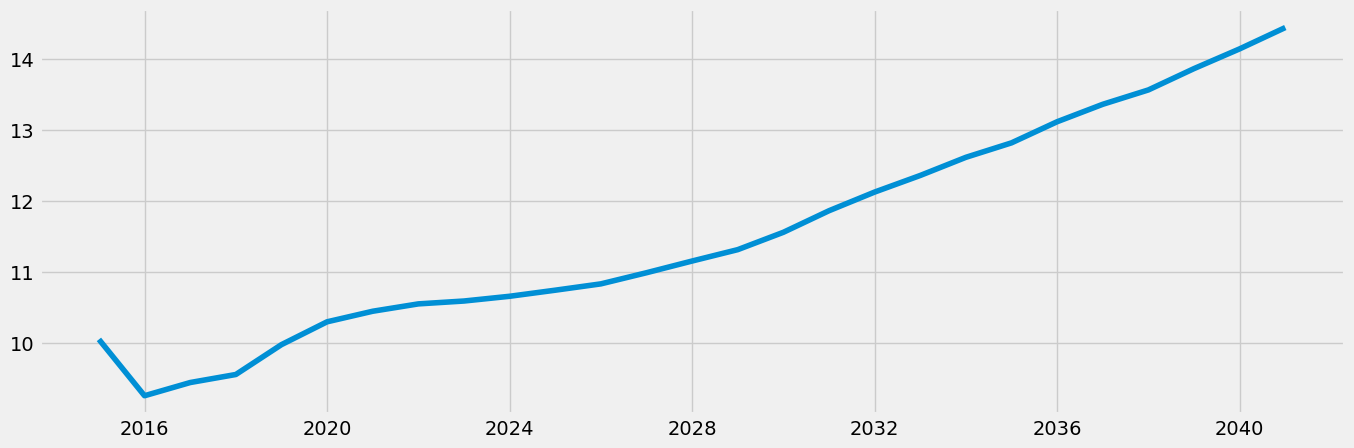

In [14]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

In [15]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [16]:
data_2.head()

,Date,Value
0,2014-12-31,10.051101
1,2015-12-31,9.259127
2,2016-12-31,9.444813
3,2017-12-31,9.557723
4,2018-12-31,9.977324


In [19]:
data_sub = data_2.loc[(data_2['Date'] >= '2014-12-31') & (data_2['Date'] < '2022-12-31')]

In [20]:
data_sub.shape

(8, 2)

In [21]:
data_sub.head()

,Date,Value
0,2014-12-31,10.051101
1,2015-12-31,9.259127
2,2016-12-31,9.444813
3,2017-12-31,9.557723
4,2018-12-31,9.977324


In [22]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2014-12-31,10.051101
2015-12-31,9.259127
2016-12-31,9.444813
2017-12-31,9.557723
2018-12-31,9.977324


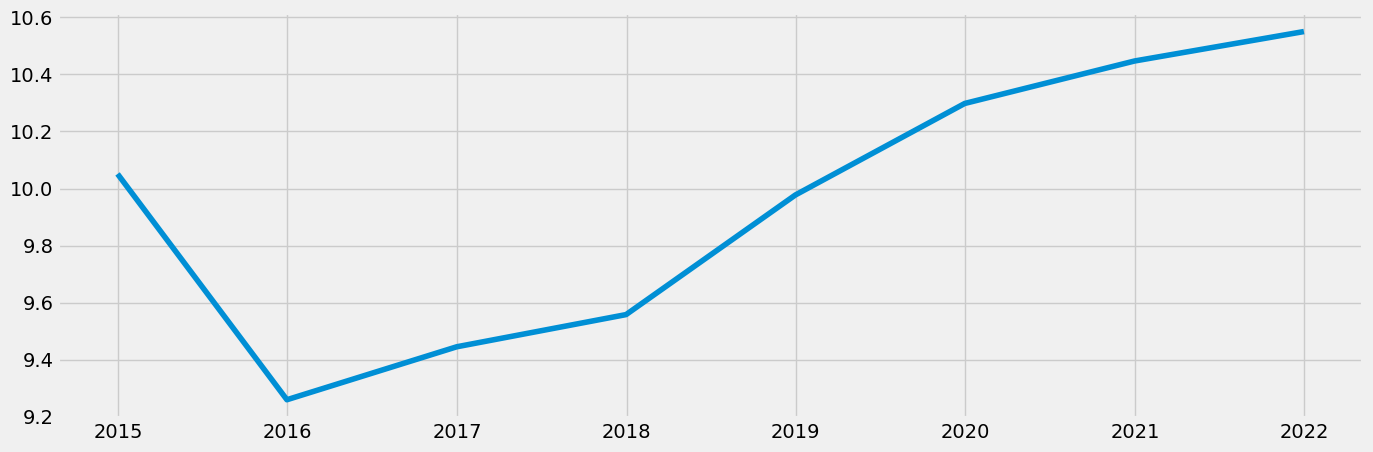

In [23]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [24]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [25]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

As the data had future predictions, I made sure to only include data that has actually come to pass, and excluded all future predictions. 

### 3. Time-series analysis: decomposition

In [26]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [27]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

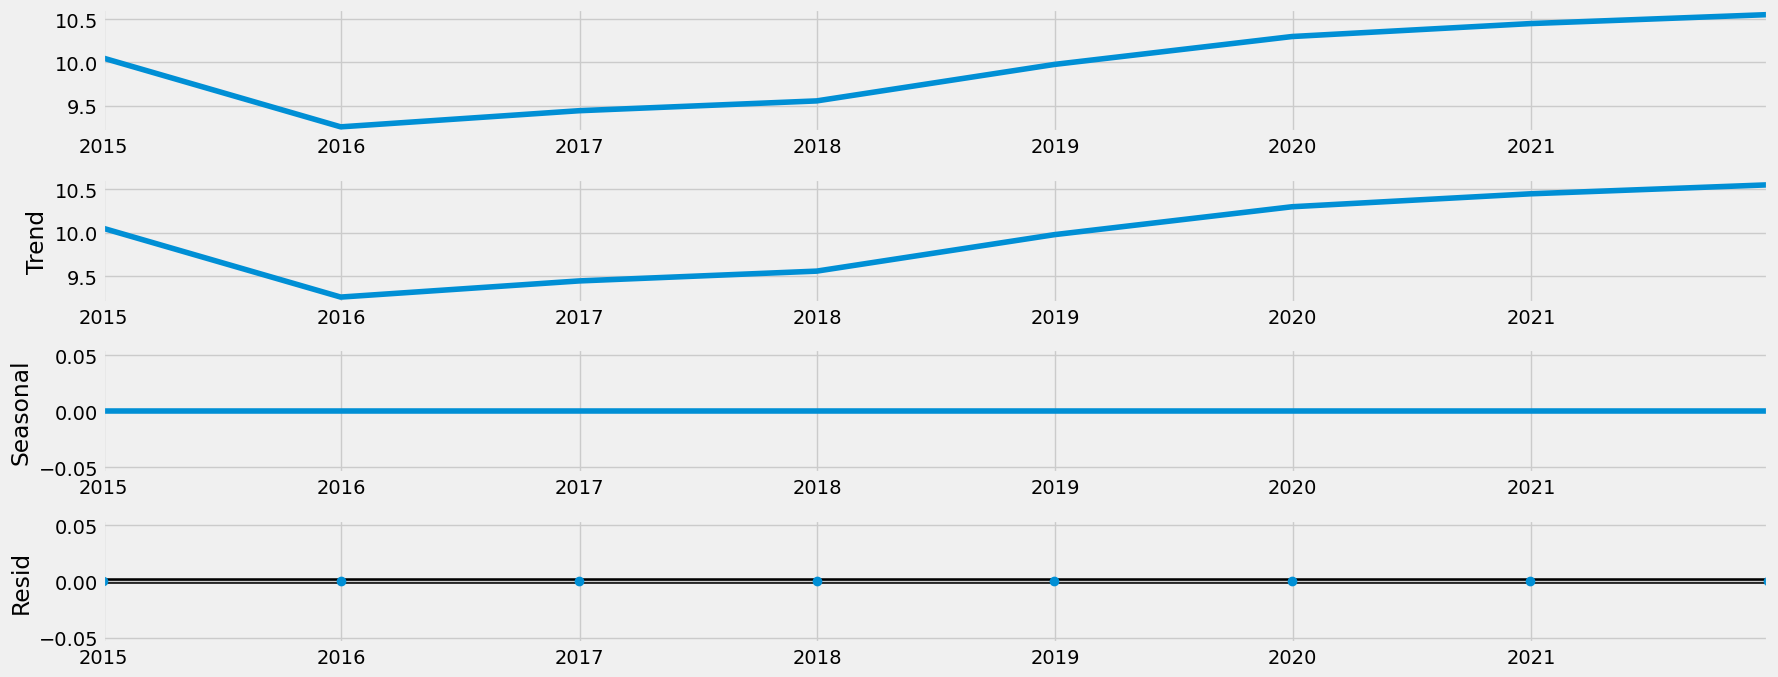

In [28]:
# Plot the separate components

decomposition.plot()
plt.show()

As the data does not have much noise, the level and trend appear the same. It clearly shows that aside from a dip in 2016, the price for electricity in the Rockies has increased throughout the years. There does not appear to be any seasonality, which is to be expected as people need electricity the whole year, and companies charge a similar rate throughout the year. On a micro level, companies may charge less in the middle of the day and night, and more in the evenings and morning, but as that is noise, it would not be seen here. 

### 4. Testing for stationarity

In [29]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.896266
p-value                        0.045784
Number of Lags Used            2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


As the test statistic is smaller than the critical value, and the p-value is less than 0.05, we can determine that the data is stationary. 

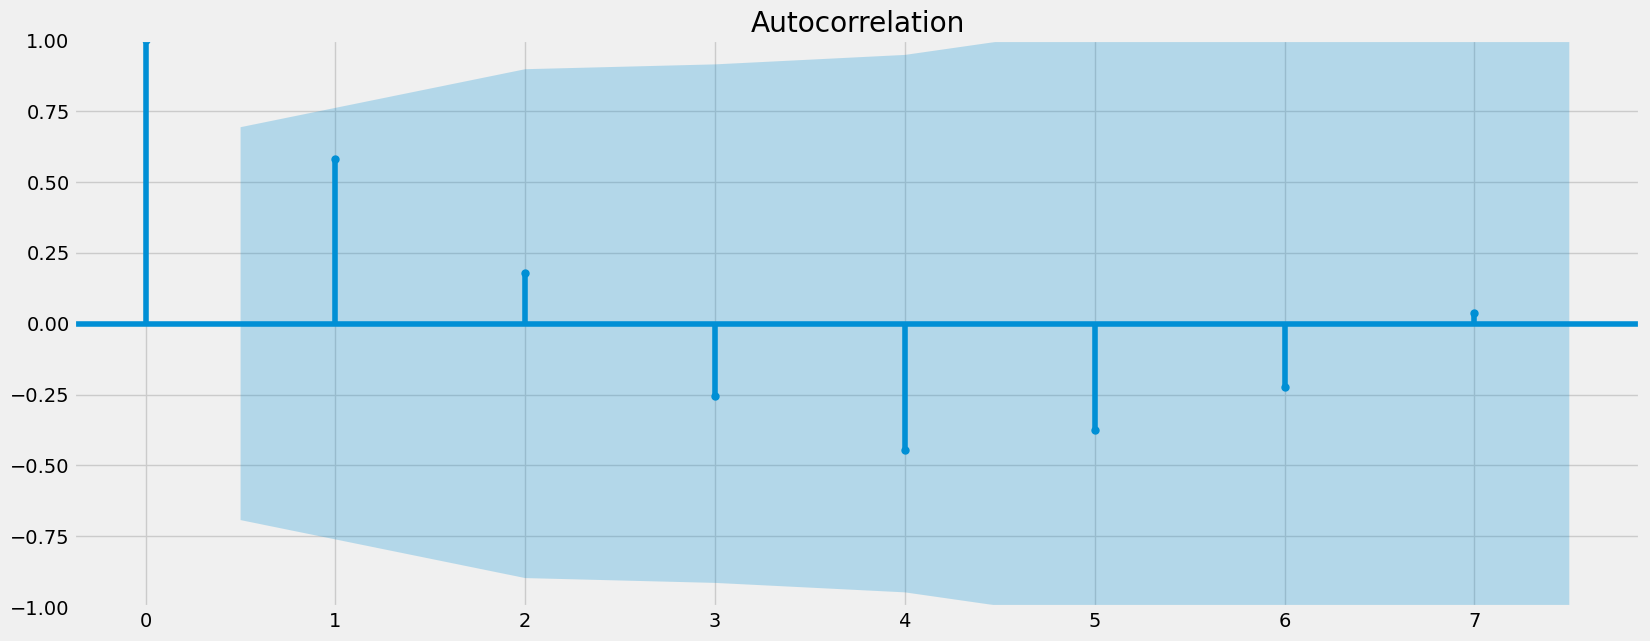

In [31]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()